In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Fraud_check.csv")

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

In [10]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label=LabelEncoder()
data["Undergrad"]=label.fit_transform(data["Undergrad"])
data["Marital.Status"]=label.fit_transform(data["Marital.Status"])
data["Urban"]=label.fit_transform(data["Urban"])

In [13]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0


In [14]:
x=data.drop(['Taxable.Income'],axis=1)
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [15]:
y=data[["Taxable.Income"]]
y.head()

,Taxable.Income
0,1
1,1
2,1
3,1
4,1


In [16]:
from sklearn.model_selection import KFold, train_test_split

In [17]:
kfold=KFold(n_splits=10,random_state=11)

C:\Users\suhas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model=RandomForestClassifier(n_estimators=110,max_features=3)

In [20]:
model

RandomForestClassifier(max_features=3, n_estimators=110)

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
result=cross_val_score(model,x,y,cv=kfold)

C:\Users\suhas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\suhas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\suhas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\suhas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

In [23]:
result

array([0.75      , 0.76666667, 0.66666667, 0.7       , 0.73333333,
       0.63333333, 0.83333333, 0.71666667, 0.75      , 0.86666667])

In [24]:
result.mean()

0.7416666666666668

In [25]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 5), (120, 5), (480, 1), (120, 1))

In [27]:
model1=RandomForestClassifier(n_estimators=110,max_features=3)
model1.fit(x_train,y_train)

<ipython-input-27-87c319995762>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(x_train,y_train)


RandomForestClassifier(max_features=3, n_estimators=110)

In [28]:
y_pred_train=model1.predict(x_train)
y_pred_train

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_pred_train,y_train)

1.0

In [31]:
 y_pred=model1.predict(x_test)

In [32]:
accuracy_score(y_pred,y_test)

0.7583333333333333

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_pred,y_test)

array([[ 0,  9],
       [20, 91]], dtype=int64)

In [35]:
imp_features=pd.Series(model1.feature_importances_,index=x.columns).sort_values(ascending=False)
imp_features

City.Population    0.535055
Work.Experience    0.277093
Marital.Status     0.084931
Urban              0.055485
Undergrad          0.047436
dtype: float64

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

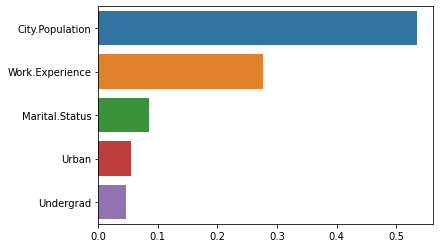

In [37]:
sns.barplot(x=imp_features,y=imp_features.index)

In [38]:
train_accuracy=[]
test_accuracy=[]
for max_features in range(1,5):
    model_1=RandomForestClassifier(n_estimators=110,max_features=4)
    model_1.fit(x_train,y_train)
    train_accuracy.append(model1.score(x_train,y_train))
    test_accuracy.append(model_1.score(x_test,y_test))

<ipython-input-38-67fa9faf3dc0>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(x_train,y_train)
<ipython-input-38-67fa9faf3dc0>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(x_train,y_train)
<ipython-input-38-67fa9faf3dc0>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(x_train,y_train)
<ipython-input-38-67fa9faf3dc0>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(x_train,y_train)


In [40]:
dataframe=pd.DataFrame({"max_features":range(1,5),
                        "train_acc":train_accuracy,
                    "test_acc":test_accuracy
                       })
dataframe

,max_features,train_acc,test_acc
0,1,1.0,0.750000
1,2,1.0,0.766667
2,3,1.0,0.733333
3,4,1.0,0.758333


# Conclusion:
### The accuracy for this model is 0.75, hence it will provide classification to the attribute.